# RMC for exp
We solve 
$$y'=y$$
$y(0) =1$ with RMC.


In [2]:
from random import random
from math import sqrt
#estimator for exp(x) without control variate
def yr(start,eps):
    return 1 + start* yr(random()*start,eps) if start>eps else 1

#estimator for exp(x) with control variate 1 + x 
def yrs(start,eps):
    if start<eps:
        return 1+start + start**2/2
    else:
        s = random()*start
        return 1+ start + start**2/2 + start*(yrs(s,eps)-1-s)

#estimator for exp(x) with control variate 1 +x+x**2/2 
def yrr(start,eps):
    if start<eps:
        return 1+start + start**2/2 + start**3/6
    else:
        s = random()*start
        return 1+ start + start**2/2 + start**3/6+ start*(yrs(s,eps)-1-s-s**2/2)

def f(fun,start,eps=0.01,nsim=1000):
    res = 0
    for _ in range(nsim):
        res +=fun(start,eps)/nsim
    return res


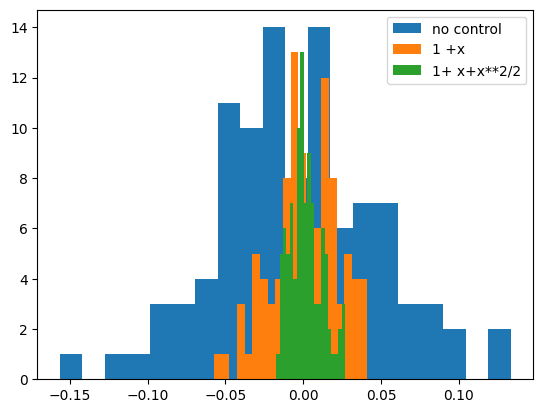

In [3]:
from math import exp
import matplotlib.pyplot as plt
tmp1=[]
for _ in range(100):
    tmp1.append(f(yr,1, 0.0001,100)-exp(1))

tmp2=[]
for _ in range(100):
    tmp2.append(f(yrs,1, 0.0001,100)-exp(1))

tmp3=[]
for _ in range(100):
    tmp3.append(f(yrr,1, 0.0001,100)-exp(1))

plt.hist(tmp1, bins = 20, label= "no control")
plt.hist(tmp2, bins = 20, label= "1 +x")
plt.hist(tmp3, bins = 20, label= "1+ x+x**2/2")
plt.legend()
plt.show()
    

In [4]:
def test(start,eps,memo):
    if start<eps :
        res = 1
    else:
        y, m = test(random()*start,eps,memo) 
        memo +=m
        res = 1 + start* y
    memo += [(start,res)] 
    return res, memo

    

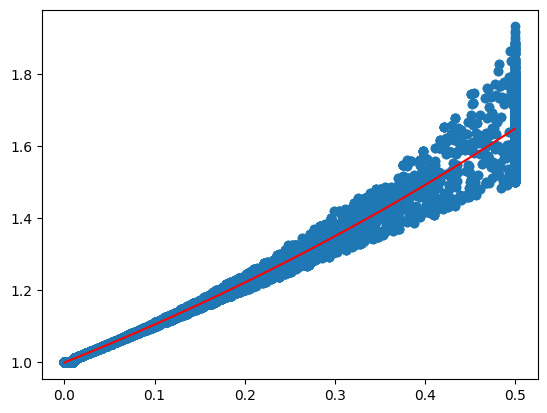

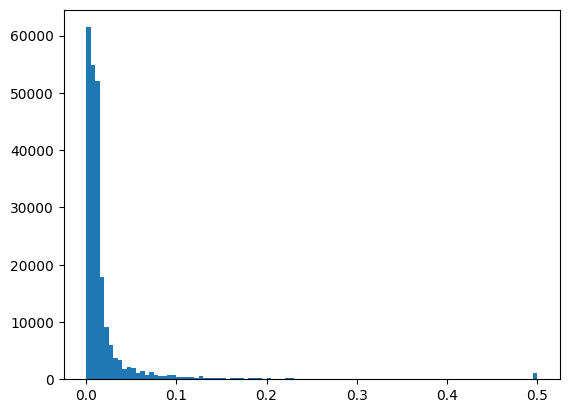

In [5]:
m = []
for _ in range(1000):
    memo = []
    test(0.5,0.01,memo)
    m +=memo

x,y = zip(*m)
xx = [n/1000 for n in range(0,500)]
yy = [exp(xi) for xi in xx]
plt.plot(xx,yy,color ="red")
plt.scatter(x,y)
plt.show()

plt.hist(x,bins = 100)
plt.show()

In [6]:
def test_kill(start,memo):
    p_of_kill = 1-start
    if random()<p_of_kill:
        res = 1
    else:
        y, m = test_kill(random()*start,memo) 
        memo +=m
        res = 1 + start* y/(1-p_of_kill)
    memo += [(start,res)] 
    return res, memo

    

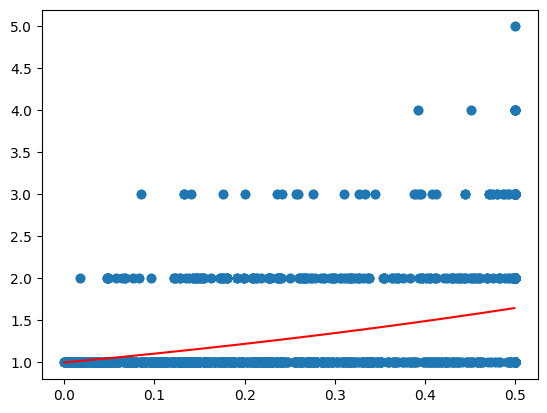

0.02927872929984554


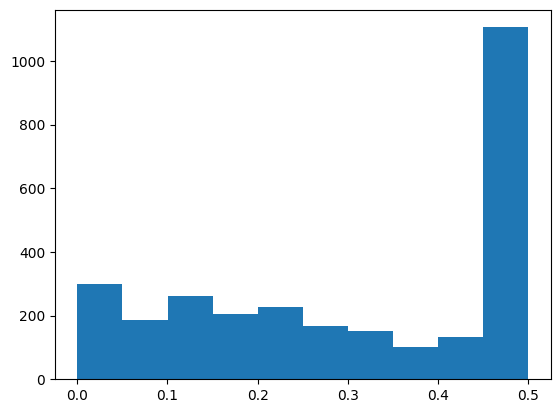

In [7]:
m = []
res=0
for _ in range(1000):
    memo = []
    a,_ =test_kill(0.5,memo)
    res += a/1000
    m +=memo

x,y = zip(*m)
xx = [n/1000 for n in range(0,500)]
yy = [exp(xi) for xi in xx]
plt.plot(xx,yy,color ="red")
plt.scatter(x,y)
plt.show()
print(res-exp(0.5))
plt.hist(x,bins = 10)
plt.show()

In [21]:
#only works for t<1
def test_kill2(t):
    return 1 + test_kill2(random()*t) if random()>1-t else 1

res = 0
for _ in range(1000):
    res += test_kill2(1)/1000
print(res-exp(1))
    


0.018718171540926587


In [261]:
def test_kill_control(t):
    if random()<1-t:
        return 1+t + t**2/2
    else:
        s = random()*t
        return 1+ t + t**2/2 + test_kill_control(s)-1-s

res = 0
for _ in range(1000):
    res += test_kill_control(1)/1000
print(res-exp(1))

0.0038488751543175326
